**Project Title: Image Processing Manipulator**

The Image Processing Manipulator is designed to apply Fourier Transform-based image filtering techniques to enhance, modify, and analyze images. The goal is to manipulate images in the frequency domain using low-pass, high-pass, and edge detection filters and then reconstruct the image using Inverse Discrete Fourier Transform (IDFT).   This project helps in understanding frequency domain analysis and demonstrates how different filters affect image quality, making it useful for applications like image enhancement, feature extraction, and noise reduction.




In [28]:
!pip install numpy scipy matplotlib opencv-python




**Problem Statement**

In the field of image processing, many tasks such as enhancement, noise reduction, feature extraction, and edge detection are critical for various real-world applications, including medical imaging, computer vision, and remote sensing. However, traditional spatial domain processing methods often face limitations when it comes to handling complex features, extracting high-frequency information, or removing noise effectively.The objective of this project is to design an Image Processing Manipulator that utilizes Discrete Fourier Transform (DFT) to transform an image into the frequency domain for more efficient processing and manipulation.


In [5]:
import numpy as np
import scipy.ndimage
import scipy.fftpack
import matplotlib.pyplot as plt
import cv2

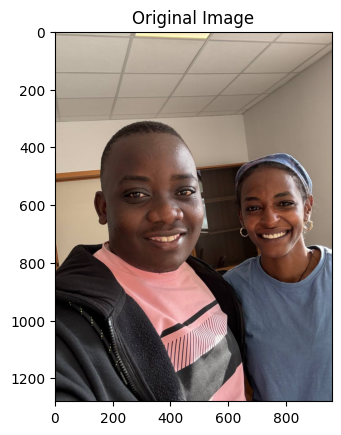

In [6]:
# Load image from /content/
image_path ="/content/image.jpg"
image = plt.imread("/content/image.jpg")
plt.imshow(image)
plt.title("Original Image")
plt.show()


In [7]:
image.shape

(1280, 959, 3)

In [8]:
image_gray=0.3*image[:,:,0]+0.6*image[:,:,1]+0.11*image[:,:,2] # time domain is frequency, frequency means the sequence

In [9]:
image_gray

array([[197.04, 197.04, 198.05, ..., 194.94, 194.94, 194.94],
       [200.07, 200.07, 200.07, ..., 192.92, 193.93, 193.93],
       [202.31, 201.3 , 201.3 , ..., 191.91, 191.91, 191.91],
       ...,
       [ 66.58,  65.57,  64.56, ..., 105.88, 106.89, 107.9 ],
       [ 65.57,  63.55,  61.53, ..., 106.89, 107.9 , 108.91],
       [ 69.61,  67.59,  64.56, ..., 107.9 , 108.91, 109.92]])

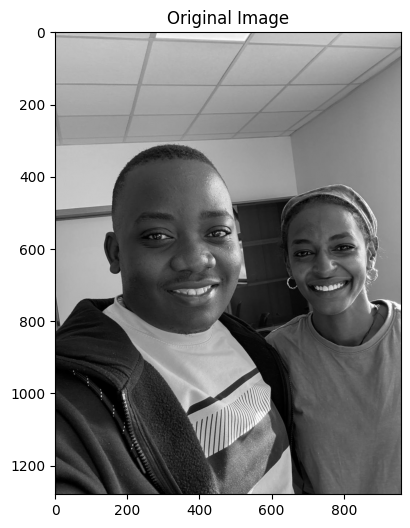

In [10]:
# Convert to grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(6,6))
plt.imshow(image,cmap='gray')
plt.title("Original Image")
plt.show()

In [11]:
ft=np.fft.fft2(image_gray)
ft

array([[ 1.38321814e+08-1.92336813e-10j,  9.32150620e+05+3.43858177e+05j,
         1.39511550e+07+3.50666776e+06j, ...,
        -5.51206176e+06+1.31793388e+06j,  1.39511550e+07-3.50666776e+06j,
         9.32150620e+05-3.43858177e+05j],
       [ 1.11832752e+07-2.09195964e+07j, -9.90020559e+06-4.46760196e+06j,
        -1.15084449e+07-2.48374205e+06j, ...,
         2.94634906e+06-5.04833436e+06j,  3.26630706e+06+2.86563853e+06j,
        -6.84959264e+06-9.90364036e+06j],
       [-1.59731405e+06-9.01923940e+06j,  8.62203022e+05+6.64332075e+05j,
         2.34785048e+06+2.88910246e+06j, ...,
         7.80801373e+05-2.62487000e+06j, -2.12140486e+06+7.86747116e+06j,
         1.20289042e+07-8.65602748e+05j],
       ...,
       [ 1.76667070e+06+7.06516060e+06j,  6.39528445e+05-1.79016594e+06j,
        -5.13850666e+06+1.79008947e+05j, ...,
        -6.71305228e+05+5.31797731e+05j,  1.72822259e+06-3.18951067e+05j,
        -3.39054689e+06-3.90377873e+06j],
       [-1.59731405e+06+9.01923940e+06j,  1.

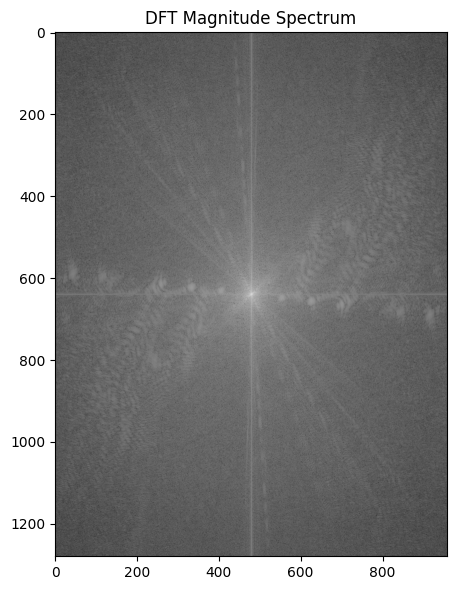

In [12]:
# Apply Discrete Fourier Transform (DFT)
def apply_dft(img):
    dft = np.fft.fft2(img)# shifting function brings the image in the center
    dft_shift = np.fft.fftshift(dft)  # Center the frequencies
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)  # Log scale for visualization
    return dft_shift, magnitude_spectrum

dft_shift, magnitude_spectrum = apply_dft(image)# high frequeuncy means there is a big change from one color to another low freq we isolate less important to centre


plt.figure(figsize=(12, 6))
#plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title("DFT Magnitude Spectrum")
plt.tight_layout()
plt.show()
              # By applying the DFT, we represent the image in terms of frequencies (low or high).

/tmp/ipython-input-488777066.py:2: RuntimeWarning: invalid value encountered in log
  plt.imshow(20*np.log(np.real(ft)),cmap='gray')


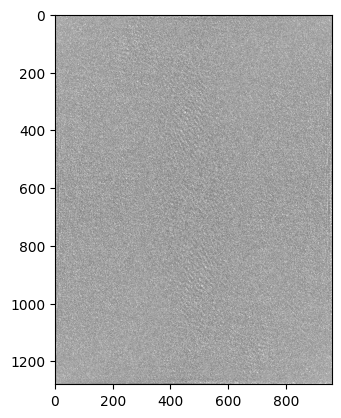

In [13]:
ft_shift=np.fft.fftshift(ft)
plt.imshow(20*np.log(np.real(ft)),cmap='gray')

1280 959
1280 959


Text(0.5, 1.0, 'Low-Pass Filtered DFT')

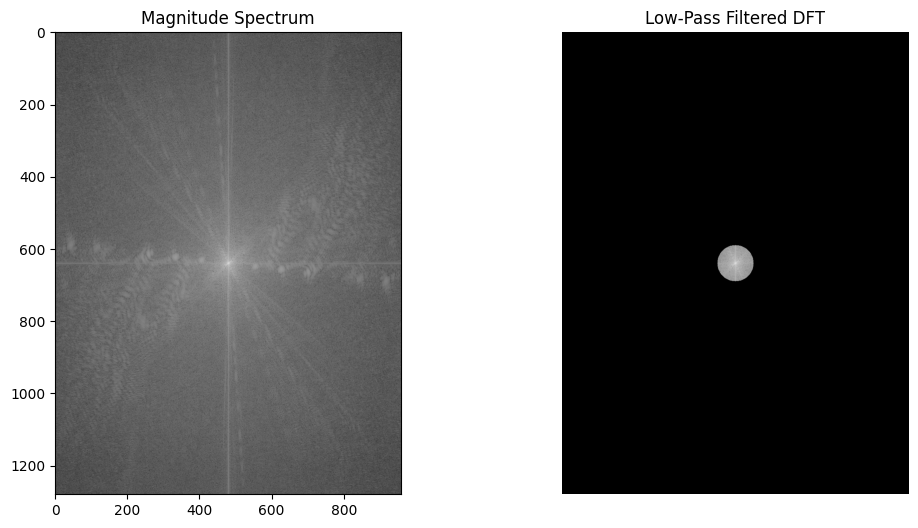

In [14]:
# Apply frequency filters
def apply_filter(dft_shift, filter_type="low", radius=30):
    """Apply a frequency filter (low-pass or high-pass)"""
    rows, cols = dft_shift.shape

    print(rows,cols)
    crow, ccol = rows // 2 , cols // 2  # Center
 # Low-pass filter
    mask = np.zeros((rows, cols), np.uint8)
    if filter_type == "low":
        cv2.circle(mask, (ccol, crow), radius, 1, -1)  #Removes high frequencies components and preserves low frequencies, creating a blurring effect useful for noise reduction.

 # High-pass filter
    elif filter_type == "high": #It removes low-frequency components and Preserves high frequencies, making edges sharper and enhancing details.

        mask[:, :] = 1
        cv2.circle(mask, (ccol, crow), radius, 0, -1) #1-lowpass filter

    dft_filtered = dft_shift * mask
    return dft_filtered



#display of magnitude spectrum
low_pass_dft = apply_filter(dft_shift, "low", radius=50)
high_pass_dft = apply_filter(dft_shift, "high", radius=50)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Magnitude Spectrum")

#display of low-pass filtered Dft
plt.subplot(122)
plt.imshow(np.log(np.abs(low_pass_dft) + 1), cmap="gray")
plt.axis("off")
plt.title("Low-Pass Filtered DFT")


In [15]:
row, col = image_gray.shape
row,col

(1280, 959)

In [16]:
row, col = image_gray.shape
c_row = row // 2
c_col = col // 2
c_row,c_col

(640, 479)

In [17]:
ft_lpf = low_pass_dft  # Assign 'low_pass_dft' to 'ft_lpf'
ft_lpf.shape

(1280, 959)

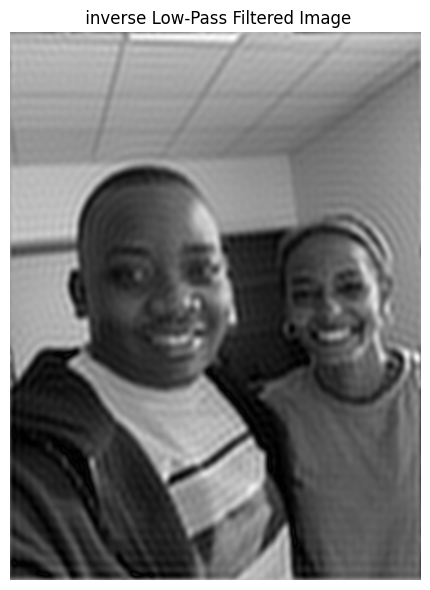

In [18]:
# inverse fourier transformer
def apply_idft(dft_shift):
    dft_ishift = np.fft.ifftshift(dft_shift)
    img_reconstructed = np.fft.ifft2(dft_ishift) #Converts modified image back to the spatial domain to visualize results.

    return np.abs(img_reconstructed)

image_low_pass = apply_idft(low_pass_dft)
image_high_pass = apply_idft(high_pass_dft)

#display

plt.figure(figsize=(12, 6))
#plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title("Original Image"), plt.axis("off")
plt.subplot(122), plt.imshow(image_low_pass, cmap='gray'), plt.title(" inverse Low-Pass Filtered Image"), plt.axis("off")

plt.tight_layout()
plt.show()


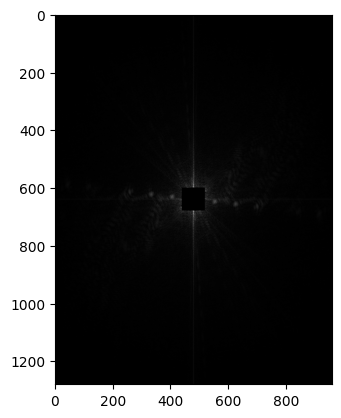

In [19]:
#removing the information in the middle
[row,col]=image_gray.shape
c_row=row//2
c_col=col//2
ft_shift[c_row-40:c_row+40,c_col-40:c_col+40]=0

plt.imshow(np.abs(np.abs(ft_shift)),cmap='gray')

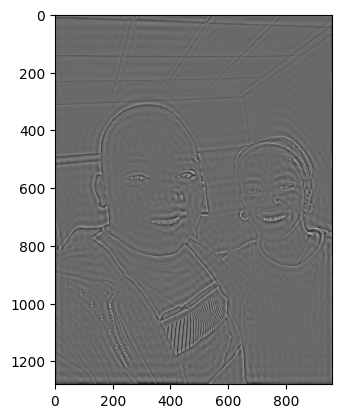

In [20]:
ft_hpf_shift=np.fft.ifftshift(ft_shift)
ft_hpf_shift_ifft=np.fft.ifft2(ft_hpf_shift)
plt.imshow(np.real((ft_hpf_shift_ifft)),cmap='gray')

In [21]:
ft_hpf_shift_ifft

array([[ 59.63513293+0.66976658j,  61.06856764+0.37830783j,
         63.35422933+0.07795237j, ...,  52.55973341+1.35110723j,
         54.29785027+1.16876185j,  55.96810364+0.93775913j],
       [ 56.08637029+0.80059255j,  57.35980419+0.53290849j,
         58.49252146+0.25022047j, ...,  44.5206993 +1.39002168j,
         47.07177988+1.23989437j,  48.55442452+1.04017436j],
       [ 51.9062794 +0.90590727j,  52.02109897+0.66958506j,
         53.02213246+0.41255373j, ...,  37.61861768+1.3861156j ,
         38.97253372+1.27279664j,  40.27823575+1.11021228j],
       ...,
       [-50.91962314+0.16876162j, -49.95858057-0.14384727j,
        -49.20388024-0.44615001j, ..., -18.41181237+1.00215223j,
        -15.03426183+0.75789131j, -11.7448115 +0.47490583j],
       [-58.51417963+0.34864272j, -58.75069874+0.03453537j,
        -59.17814006-0.27565j   , ..., -23.36354463+1.15328105j,
        -20.19997748+0.92333278j, -17.11941118+0.65024761j],
       [-61.1353723 +0.51748883j, -61.55153049+0.2104467j 

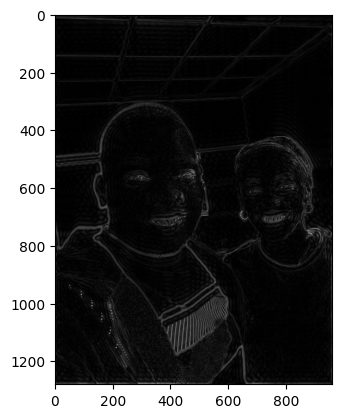

In [22]:
plt.imshow(np.abs((ft_hpf_shift_ifft)),cmap='gray')

1280 959


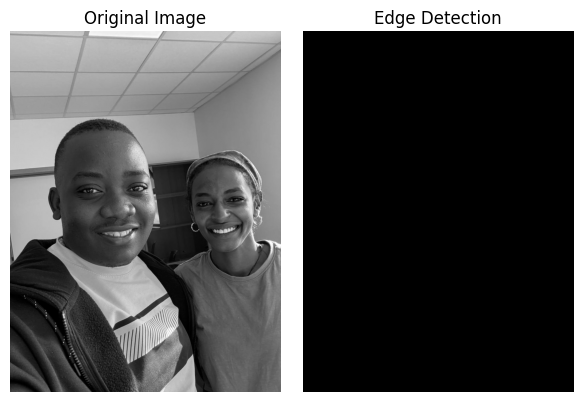

In [23]:
filter_radius = 50
edge_dft = apply_filter(dft_shift, "edge", filter_radius)

image_edge = apply_idft(edge_dft) # calculate the spatial domain image with edge filter
fig, axes = plt.subplots(1, 2, figsize=(6, 4))
axes[1].axis("off")

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

# Display the edge-detected image in the second subplot
axes[1].imshow(image_edge, cmap='gray') #Edge Detection – Isolates edges using a custom frequency filter, helping in feature extraction.
axes[1].set_title("Edge Detection")  # It focuses on edges by highlighting high-frequency components around sharp intensity transitions.
axes[1].axis("off")

# Adjust layout and display the figure
plt.tight_layout()
plt.show()


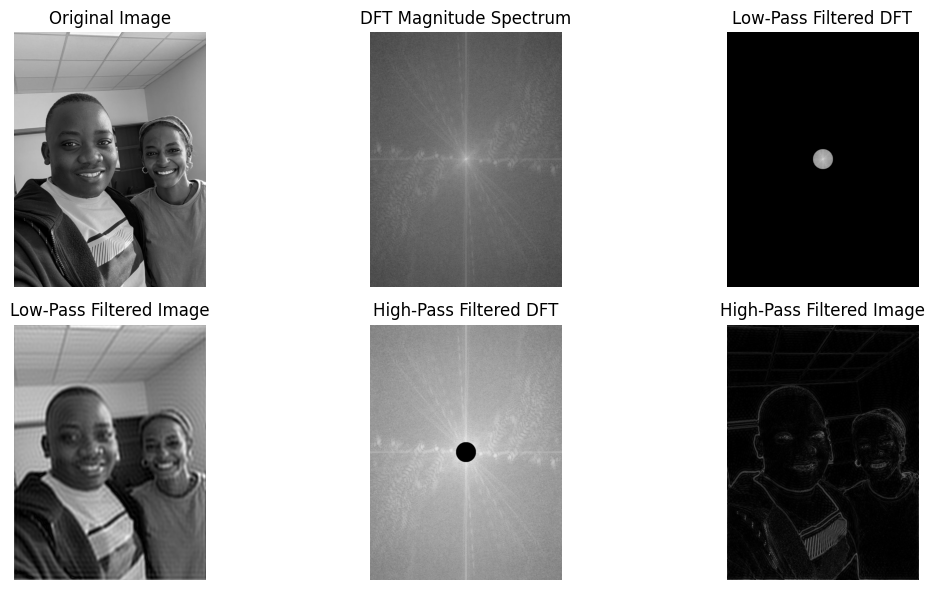

In [24]:
# Display results
plt.figure(figsize=(12, 6))

plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title("Original Image"), plt.axis("off")
plt.subplot(232), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title("DFT Magnitude Spectrum"), plt.axis("off")
plt.subplot(233), plt.imshow(np.log(np.abs(low_pass_dft) + 1), cmap='gray'), plt.title("Low-Pass Filtered DFT"), plt.axis("off")
plt.subplot(234), plt.imshow(image_low_pass, cmap='gray'), plt.title("Low-Pass Filtered Image"), plt.axis("off")
plt.subplot(235), plt.imshow(np.log(np.abs(high_pass_dft) + 1), cmap='gray'), plt.title("High-Pass Filtered DFT"), plt.axis("off")
plt.subplot(236), plt.imshow(image_high_pass, cmap='gray'), plt.title("High-Pass Filtered Image"), plt.axis("off")


plt.tight_layout()
plt.show()

In [25]:
def colored_square(image, x, y, l, color):
    """Draws a colored square on the image."""
    x_end = min(x + l, image.shape[0])
    y_end = min(y + l, image.shape[1])

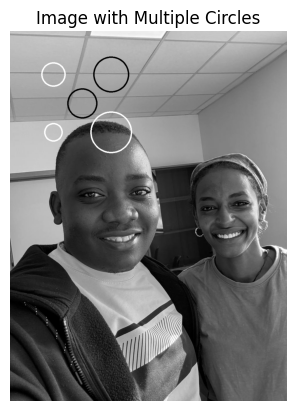

In [26]:
# Define circles with different parameters (center, radius, color, thickness)
circles = [
    ((250, 250), 50, (0, 255, 0), 3),  # Green
    ((150, 150), 40, (255, 0, 0), 3),  # Blue
    ((350, 150), 60, (0, 0, 255), 3),  # Red
    ((150, 350), 30, (255, 255, 0), 3),  # Cyan
    ((350, 350), 70, (255, 0, 255), 3)   # Magenta
]

# Create a copy of the image
image_copy = image.copy()

# Draw each circle on the image
for center, radius, color, thickness in circles:
    cv2.circle(image_copy, center, radius, color, thickness)

# Convert BGR to RGB for Matplotlib
image_rgb = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Image with Multiple Circles")
plt.show()